
<img src="dataset-cover.jpg" alt="Circular Image" style="border-radius: 50%; display: block; margin: 0 auto; width: 200px; height: 200px;">
<h1>Logistics Supply chain real world data</h1>
<p>Real-World Insights: Optimizing Logistics and Supply Chain Data</p>
<h2>About Dataset</h2>
<p><b>Problem set :</b> This is a multi-label delivery delay prediction problem, which is a challenge often encountered by supply chain practitioners from various industries in their daily operations.</p>
<p><b>Testing :</b> A tabular dataset that consists of a set of variables related to delivery will be provided to the participants to develop their delay prediction models.</p>
<p><b>Evaluation Metric:</b> An ideal delay prediction algorithm shall be able to accurately predict delivery arrival status.</p>
<h2>Project Description</h2>
<p>Analyze data in depth and provide concrete strategies to <b>increase revenue</b> in the coming quarter.</p>
<h3>Source</h3>
<p><b>Kaggle: </b><a href="https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data/data">click here!!!</a></p>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("datasets/incom2024_delay_example_dataset.csv")
df_desc  = pd.read_csv("datasets/incom2024_delay_variable_description.csv")
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [4]:
df.shape

(15549, 41)

# 1. Data Cleaning

## 1.Relevant Features

<p>Based on the file <b>incom2024_delay_variable_description.csv</b>, the selected features are only those relevant for increasing revenue in the next quarter alone.</p>


In [5]:
relevant_features = [
    'sales',
    'profit_per_order',
    'sales_per_customer',
    'order_item_total_amount',
    'order_profit_per_order',
    'order_item_profit_ratio',
    'order_item_product_price',
    'order_item_discount',
    'order_item_discount_rate',
    'product_price',
    'order_item_quantity',
    'order_status',
    'customer_segment',
    'customer_country',
    'order_country',
    'market',
    'order_region',
    'customer_city',
    'order_city',
    'customer_state',
    'order_state',
    'category_name',
    'category_id',
    'product_category_id',
    'product_name',
    'product_card_id',
    'department_name',
    'department_id',
    'order_date',
    'shipping_date',
    'shipping_mode'
]

df_relevant = df[relevant_features]
df_relevant_desc = df_desc[df_desc['variable_name'].isin(relevant_features)]
print("Dataframe shape:",df_relevant.shape)
print("Dataframe Description shape:", df_relevant_desc.shape)

Dataframe shape: (15549, 31)
Dataframe Description shape: (31, 3)


In [6]:
df_relevant.to_csv("datasets/df_relevant.csv", index=False)
df_relevant_desc.to_csv("datasets/df_relevant_desc.csv", index=False)
print("File Saved!!!")

File Saved!!!


## 2. Data Missing

In [ ]:
df = pd.read_csv("datasets/df_relevant.csv")
df.head()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio,order_item_product_price,order_item_discount,order_item_discount_rate,product_price,...,category_name,category_id,product_category_id,product_name,product_card_id,department_name,department_id,order_date,shipping_date,shipping_mode
0,99.99,34.448338,92.49099,84.99157,32.083145,0.41,99.99,12.623338,0.13,99.99,...,Cardio Equipment,9.0,9.0,Nike Men's Free 5.0+ Running Shoe,191.0,Footwear,3.0,2015-08-12 00:00:00+01:00,2015-08-13 00:00:00+01:00,Standard Class
1,199.99,91.193540,181.99008,181.99000,91.235870,0.48,199.99,16.500000,0.07,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2017-02-10 00:00:00+00:00,2017-04-09 00:00:00+01:00,Standard Class
2,99.96,8.313806,89.96643,93.81015,6.965549,0.09,49.98,6.600000,0.06,49.98,...,Indoor/Outdoor Games,46.0,46.0,O'Brien Men's Neoprene Life Vest,1014.0,Fan Shop,7.0,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00,Second Class
3,119.98,-89.463196,99.15065,99.89060,-95.401400,-0.80,59.99,16.942171,0.16,59.99,...,Cleats,17.0,17.0,Perfect Fitness Perfect Rip Deck,365.0,Apparel,4.0,2017-05-31 00:00:00+01:00,2017-03-18 00:00:00+00:00,Second Class
4,199.99,44.722590,170.97824,171.07587,44.569000,0.27,199.99,29.990000,0.15,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2015-03-28 00:00:00+00:00,2015-03-30 00:00:00+01:00,Standard Class


In [12]:
print("Total Missing Value:",df.isnull().sum().sum())

Total Missing Value: 0


## 3. Data Type

In [13]:
df.dtypes

sales                       float64
profit_per_order            float64
sales_per_customer          float64
order_item_total_amount     float64
order_profit_per_order      float64
order_item_profit_ratio     float64
order_item_product_price    float64
order_item_discount         float64
order_item_discount_rate    float64
product_price               float64
order_item_quantity         float64
order_status                 object
customer_segment             object
customer_country             object
order_country                object
market                       object
order_region                 object
customer_city                object
order_city                   object
customer_state               object
order_state                  object
category_name                object
category_id                 float64
product_category_id         float64
product_name                 object
product_card_id             float64
department_name              object
department_id               

# 2. EDA (Exploratory Data Analysis)

In [3]:
df = pd.read_csv("datasets/df_relevant.csv")
df.head()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio,order_item_product_price,order_item_discount,order_item_discount_rate,product_price,...,category_name,category_id,product_category_id,product_name,product_card_id,department_name,department_id,order_date,shipping_date,shipping_mode
0,99.99,34.448338,92.49099,84.99157,32.083145,0.41,99.99,12.623338,0.13,99.99,...,Cardio Equipment,9.0,9.0,Nike Men's Free 5.0+ Running Shoe,191.0,Footwear,3.0,2015-08-12 00:00:00+01:00,2015-08-13 00:00:00+01:00,Standard Class
1,199.99,91.193540,181.99008,181.99000,91.235870,0.48,199.99,16.500000,0.07,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2017-02-10 00:00:00+00:00,2017-04-09 00:00:00+01:00,Standard Class
2,99.96,8.313806,89.96643,93.81015,6.965549,0.09,49.98,6.600000,0.06,49.98,...,Indoor/Outdoor Games,46.0,46.0,O'Brien Men's Neoprene Life Vest,1014.0,Fan Shop,7.0,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00,Second Class
3,119.98,-89.463196,99.15065,99.89060,-95.401400,-0.80,59.99,16.942171,0.16,59.99,...,Cleats,17.0,17.0,Perfect Fitness Perfect Rip Deck,365.0,Apparel,4.0,2017-05-31 00:00:00+01:00,2017-03-18 00:00:00+00:00,Second Class
4,199.99,44.722590,170.97824,171.07587,44.569000,0.27,199.99,29.990000,0.15,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2015-03-28 00:00:00+00:00,2015-03-30 00:00:00+01:00,Standard Class


In [4]:
core = ['sales', 'profit_per_order', 'sales_per_customer', 'order_item_total_amount', 'order_profit_per_order', 'order_item_profit_ratio']
df_core = df[core]
df_core.head()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio
0,99.99,34.448338,92.49099,84.99157,32.083145,0.41
1,199.99,91.193540,181.99008,181.99000,91.235870,0.48
2,99.96,8.313806,89.96643,93.81015,6.965549,0.09
3,119.98,-89.463196,99.15065,99.89060,-95.401400,-0.80
4,199.99,44.722590,170.97824,171.07587,44.569000,0.27


In [5]:
df_core.describe()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,200.562289,22.604542,179.888256,179.780850,22.273342,0.120391
std,125.984986,99.265198,113.727323,110.999735,117.503163,0.474088
min,9.990000,-3442.500000,8.351162,7.490000,-3442.500000,-2.750000
25%,119.980000,7.562795,104.397330,105.570910,7.443977,0.080000
50%,199.920000,31.693370,165.944170,165.990000,32.440100,0.270000
75%,299.950000,63.872166,242.440930,242.436400,64.303566,0.360000
max,1999.990000,911.800000,1939.990000,1939.990000,911.800000,0.500000


In [12]:
total_rows = len(df_core)
count = ((df_core['profit_per_order'] < 0) & (df_core['order_profit_per_order'] < 0)).sum()
percentage = math.ceil((count / total_rows) * 100)
print("Total Losses That Should Have Been Profits",percentage, "%")


Total Losses That Should Have Been Profits 18 %


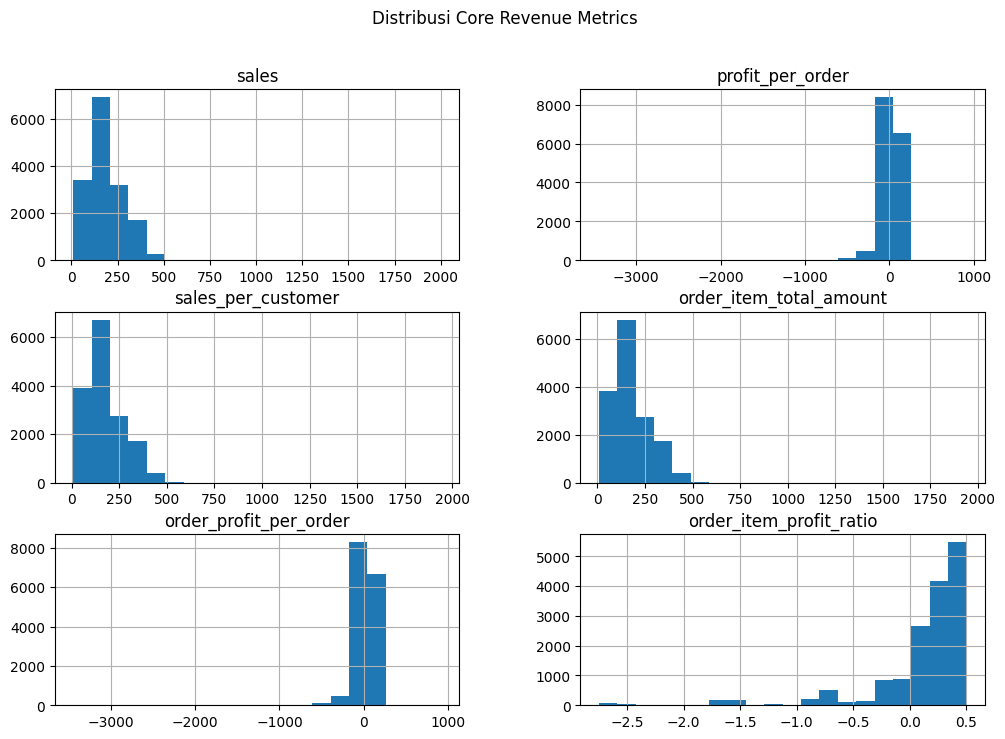

In [14]:
df_core.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribusi Core Revenue Metrics')
plt.show()

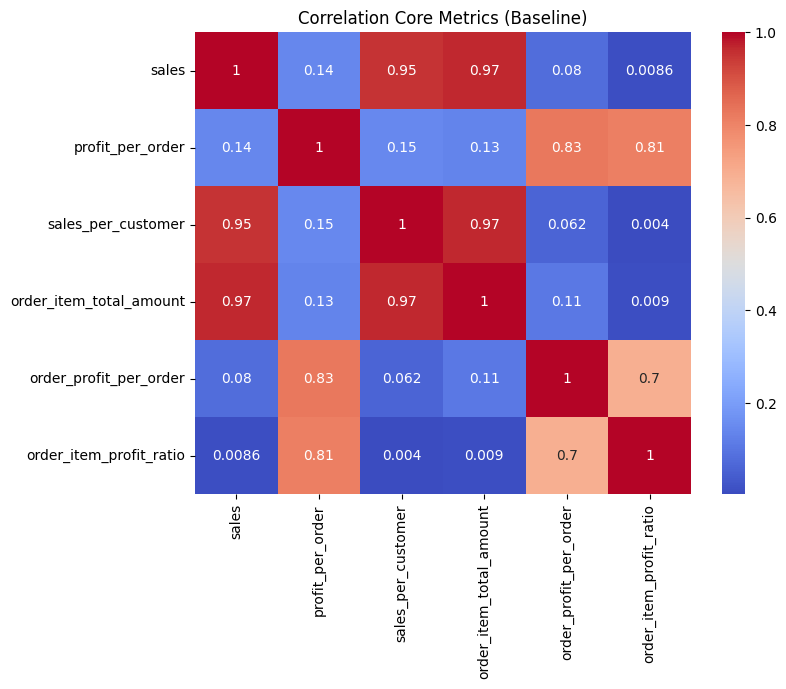

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_core.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Core Metrics (Baseline)')
plt.show()

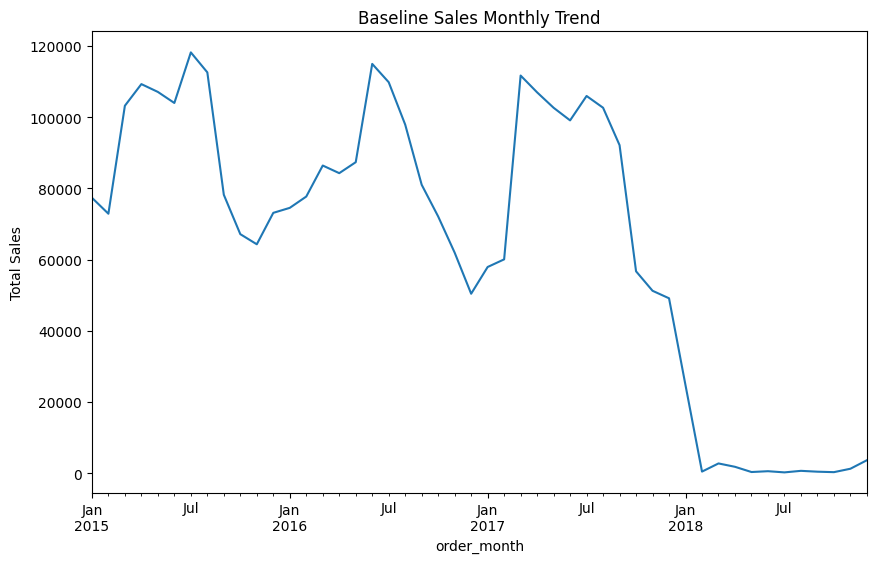

In [26]:
df_core['order_month'] = pd.to_datetime(df['order_date']).dt.to_period('M')
monthly_baseline = df_core.groupby('order_month')['sales'].sum()
monthly_baseline.plot(kind='line', figsize=(10, 6), title='Baseline Sales Monthly Trend')
plt.ylabel('Total Sales')
plt.show()

# 3. ...